**Time Series Forecasting and Portfolio Optimization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

**Fetching Data**

C:\Users\hp\AppData\Local\Temp\ipykernel_1996\2181368658.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(assets,start=start_date,end=end_date)


[*********************100%***********************]  3 of 3 completed


data.shape: (2535, 15)

Data Columns:
['Close', 'High', 'Low', 'Open', 'Volume']

 First 5 rows of the dataset
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816769  174.917084  17.943333  60.914494  175.363859   
2015-07-02  60.967098  174.756927  18.667999  61.027240  175.566188   
2015-07-06  61.177601  174.259552  18.648001  61.222710  175.043511   
2015-07-07  61.237728  175.355469  17.858667  61.470769  175.481910   
2015-07-08  61.410622  172.413483  16.997334  61.463244  174.293311   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764146  174.124686  17.856667  60.794217   
2015-07-02  18.830000  60.937027  174.33

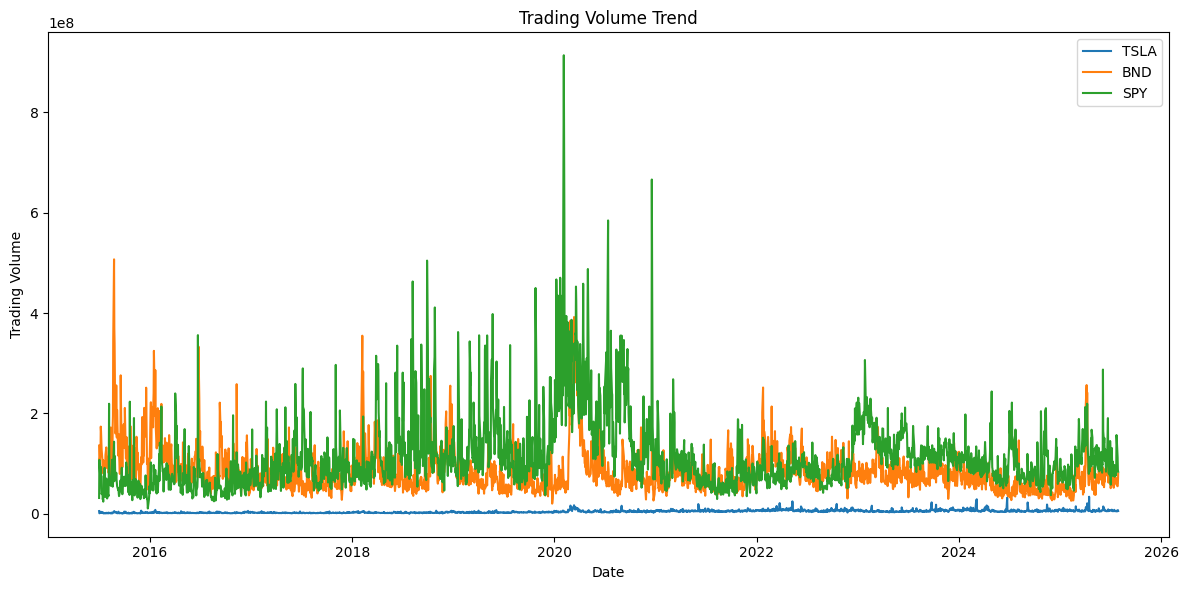

In [2]:
# Time period
start_date="2015-07-01"
end_date="2025-07-31"
# asset
assets=['TSLA','BND','SPY']

# Extracting Data
data=yf.download(assets,start=start_date,end=end_date)

# Generic Statistical Description

print("data.shape:", data.shape)
print("\nData Columns:")
print(data.columns.levels[0].tolist())

# Highlight of the dataset
print("\n First 5 rows of the dataset")
print(data.head())

# Extractiong of Adjusted Close prices
price=data['Close'].copy()

# Searching for missing values
print("\n Missing Values:")
print(price.isna().sum())

# Replacing Missing values with forwardfill
if price.isna().sum().any():
    price=price.fillna(method='ffill')
    print("Missing values filled using forward fill")

# Trading Volume Trend
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Volume'],label=assets)
plt.title('Trading Volume Trend')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.tight_layout()
plt.show()



Seasonality and Trends:
ADF Statistics of BND in price: -1.54
ADF Statistics of BND in daily return: -9.89
BND p-value in price: 0.52
BND p-value in daily return: 0.0
ADF Statistics of SPY in price: 0.69
ADF Statistics of SPY in daily return: -16.26
SPY p-value in price: 0.99
SPY p-value in daily return: 0.0
ADF Statistics of TSLA in price: -1.42
ADF Statistics of TSLA in daily return: -34.68
TSLA p-value in price: 0.57
TSLA p-value in daily return: 0.0

Volatility:
        annualized return  annualized volatility  sharpe ratio
Ticker                                                        
BND              0.019599               0.054919      0.356878
SPY              0.144844               0.182407      0.794072
TSLA             0.460690               0.591887      0.778340


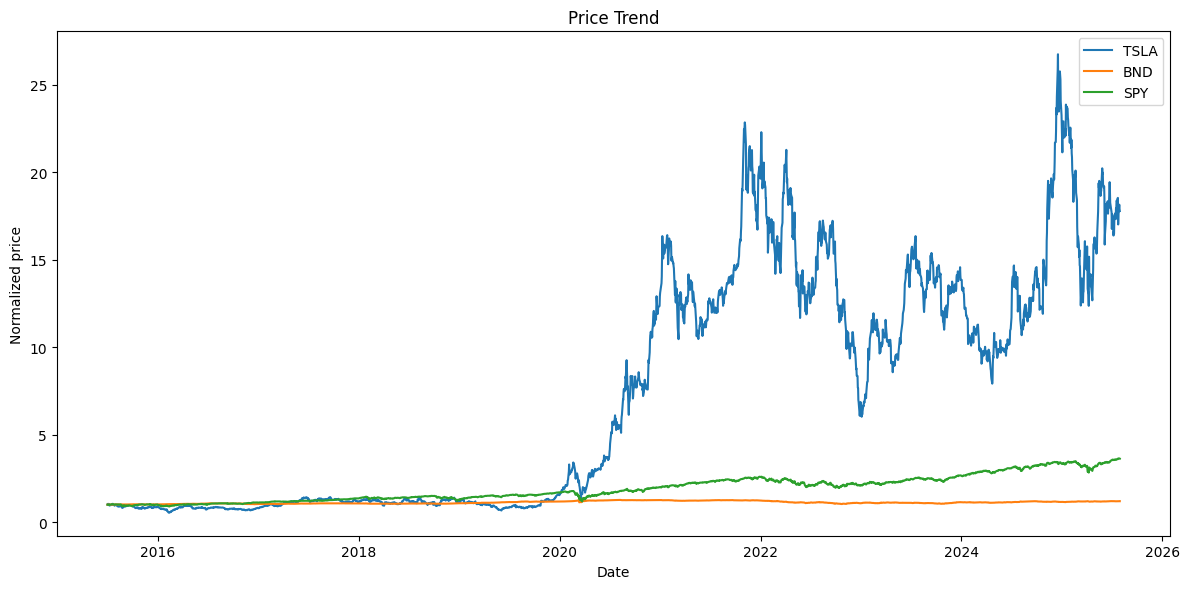

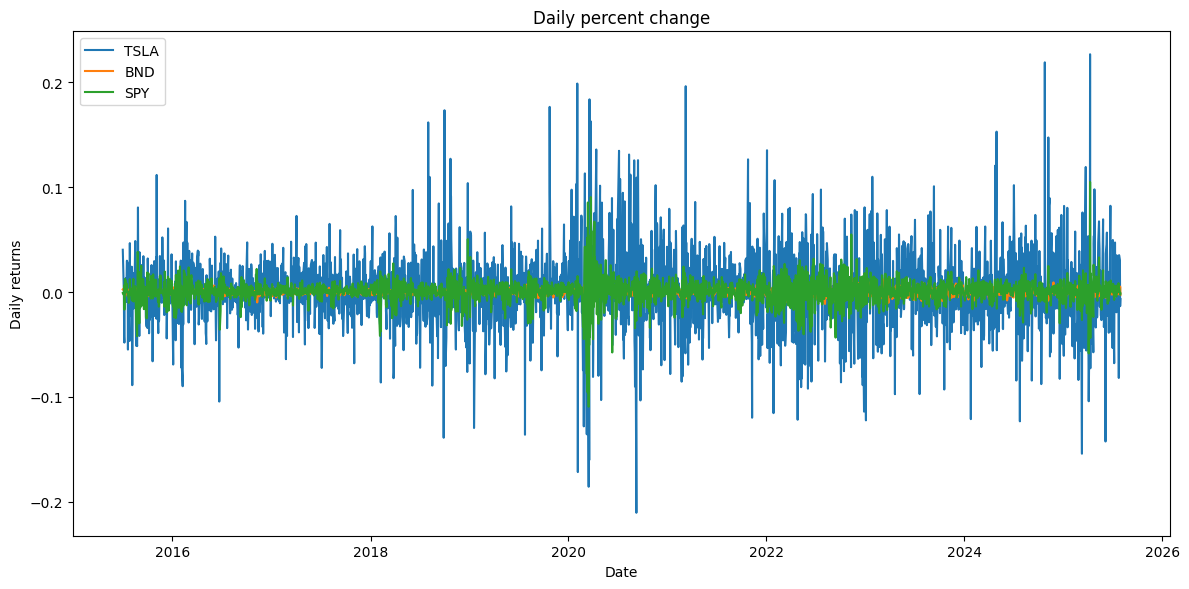

In [3]:
# Exploratory Data Analysis
# Daily returns
returns=price.pct_change().dropna()

#ploting price trend 

plt.figure(figsize=(12,6))
for asset in assets:
    plt.plot(price.index,price[asset]/price[asset].iloc[0],label=asset)
    plt.title('Price Trend')
    plt.ylabel('Normalized price')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# plot of teh change percentage
plt.figure(figsize=(12,6))
for ticker in assets:
    plt.plot(returns.index,returns[ticker],label=ticker)
    plt.title('Daily percent change')
    plt.ylabel('Daily returns')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# Seasonality and Trends

print("\nSeasonality and Trends:")
from statsmodels.tsa.stattools import adfuller

for tickers in price.columns:
    stats_price=adfuller(price[tickers])
    stats_return=adfuller(returns[tickers])
    print(f"ADF Statistics of {tickers} in price:",round(stats_price[0],2))
    print(f"ADF Statistics of {tickers} in daily return:",round(stats_return[0],2))
    print(f"{tickers} p-value in price:",round(stats_price[1],2))
    print(f"{tickers} p-value in daily return:",round(stats_return[1],2))

# Key statistics
print("\nVolatility:")
summary_stats=pd.DataFrame(index=returns.columns)
summary_stats['annualized return']=returns.mean() *252 # number of trading days in a year
summary_stats['annualized volatility']=returns.std() * np.sqrt(252)
summary_stats['sharpe ratio']= summary_stats['annualized return']/summary_stats['annualized volatility']
print(summary_stats[['annualized return','annualized volatility','sharpe ratio']])